# Spread Reversion

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from src.entry_strat import SpreadReversionEntry
from src.utils import configs

configurations = configs()

entry_strategy = SpreadReversionEntry(
    spread_reversion_configs=configurations.entry_strategies.spread_reversion.configs,
    strategy_new_cols=configurations.entry_strategies.spread_reversion.new_cols
)
data = pd.read_csv("data/raw/oanda/eur_jpy/eur_jpy_m1_01092024_31122024.csv", index_col=0, parse_dates=True)

Configurations set: 
{'spread_reversion_window': 200, 'spread_std_threshold_scalar': 1.2}


In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_last_n_with_month_axis(
    df,
    n: int,
    time_col: str = "time",
    bid_col: str = "bid",
    ask_col: str = "ask",
    spread_col: str = "spread",
    figsize: tuple = (12, 5),
):
    """
    Plot the last n rows of bid, ask and overlay spread, with x‑axis showing month only.

    Parameters
    ----------
    df : pandas.DataFrame
        Must contain columns [time_col, bid_col, ask_col, spread_col].
    n : int
        Number of rows from the end to plot.
    time_col : str
        Name of datetime column.
    bid_col, ask_col : str
        Names of bid/ask price columns.
    spread_col : str
        Name of spread column.
    figsize : tuple
        Figure size.
    """
    # 1) slice last n rows
    df2 = df.iloc[-n:].copy()

    # 2) extract our series
    times  = df2.index
    bids   = df2[bid_col]
    asks   = df2[ask_col]
    spreads= df2[spread_col]

    # 3) basic price + spread on twin axes
    fig, ax_price = plt.subplots(figsize=figsize)
    ax_price.plot(times, bids, label="Bid", color="tab:blue")
    ax_price.plot(times, asks, label="Ask", color="tab:red")
    ax_price.set_ylabel("Price")
    ax_price.set_xlabel("Month")

    # 4) format x‑axis: one tick per month, label = “Jan”, “Feb”, …
    ax_price.xaxis.set_major_locator(mdates.MonthLocator())
    ax_price.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    fig.autofmt_xdate()  # rotate if needed

    # 5) spread on secondary y‑axis
    ax_spread = ax_price.twinx()
    ax_spread.plot(times, spreads, label="Spread", color="tab:gray", alpha=0.6)
    ax_spread.set_ylabel("Spread")

    # 6) combined legend
    lines_p, labels_p = ax_price.get_legend_handles_labels()
    lines_s, labels_s = ax_spread.get_legend_handles_labels()
    ax_price.legend(lines_p + lines_s, labels_p + labels_s, loc="upper left")

    fig.tight_layout()
    return fig, ax_price, ax_spread


(<Figure size 1200x500 with 2 Axes>,
 <Axes: xlabel='Month', ylabel='Price'>,
 <Axes: ylabel='Spread'>)

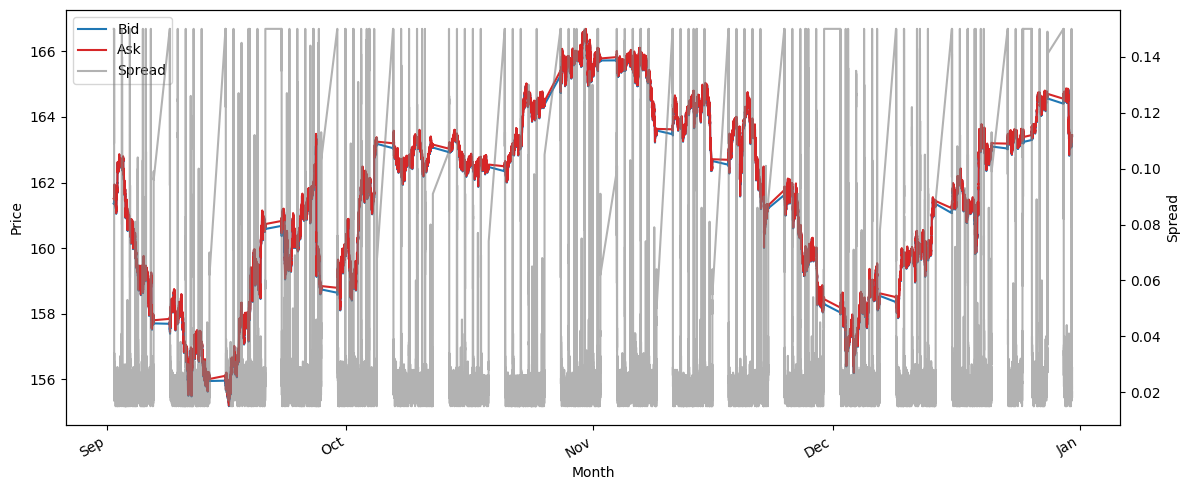

In [7]:
signal_data = entry_strategy.generate_entry_signal(data)
plot_last_n_with_month_axis(
    df=signal_data,n=10000000
)
